In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


# 1. Plot pearson r2 of different models

## 1.1 Elastic net

### 1.1.1 Compare pearson r2 of train vs test
To show over fitting and find a better threshold

Text(0.5, 1.0, 'Model performance of PC(18:0_20:4)')

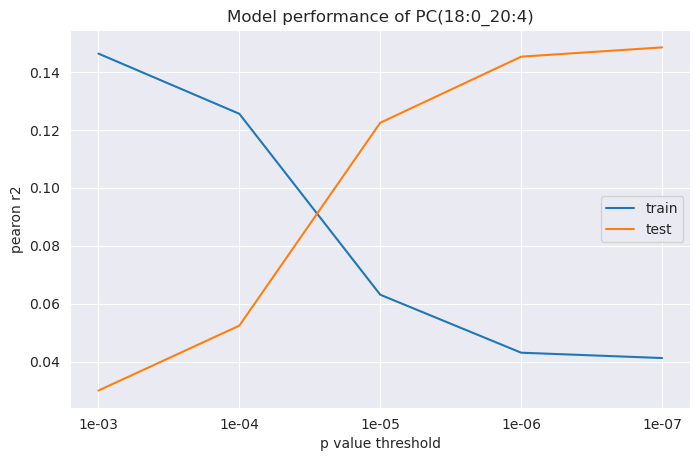

In [4]:
# Plot train and test performance of a single lipid
# PC(18:0_20:4) has the highest pearson r2 in pval 1e-07
# plot performance of train and test of this lipid
threshold = '1e-07'
lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]

reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
r2_train, r2_test, r2_train_maf, r2_test_maf = [], [], [], []
lipid = 'PC(18:0_20:4)'
for threshold in lst_threshold:
    fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
    fn_test = f'merged_h2_r2_test_species_pval_{threshold}.txt'
    df_train = pd.read_csv(os.path.join(reuslt_dir, fn_train), sep='\t')
    df_test = pd.read_csv(os.path.join(reuslt_dir, fn_test), sep='\t')
    r2_train.append(df_train[df_train['Lipid']==lipid]['pearson_r2'].values[0])
    r2_test.append(df_test[df_test['Lipid']==lipid]['pearson_r2'].values[0])
    
    # Do the same for MAF fitlered result
    # MAF file seems to have some problem. Values are the same as no MAF result
    # fn_train_maf = f'merged_h2_r2_train_species_pval_{threshold}_maf_0.01.txt'
    # fn_test_maf = f'merged_h2_r2_test_species_pval_{threshold}_maf_0.01.txt'
    # df_train_maf = pd.read_csv(os.path.join(reuslt_dir, fn_train_maf), sep='\t')
    # df_test_maf = pd.read_csv(os.path.join(reuslt_dir, fn_test_maf), sep='\t')
    # r2_train_maf.append(df_train_maf[df_train_maf['Lipid']==lipid]['pearson_r2'].values[0])
    # r2_test_maf.append(df_test_maf[df_test_maf['Lipid']==lipid]['pearson_r2'].values[0])

fig, ax = plt.subplots(figsize=(8,5), dpi=100)
ax.plot(r2_train, label='train')
ax.plot(r2_test, label='test')
ax.legend()
ax.set_xticks(range(5))
ax.set_xticklabels(lst_threshold)
ax.set_xlabel('p value threshold')
ax.set_ylabel('pearon r2')
ax.set_title(f'Model performance of {lipid}')

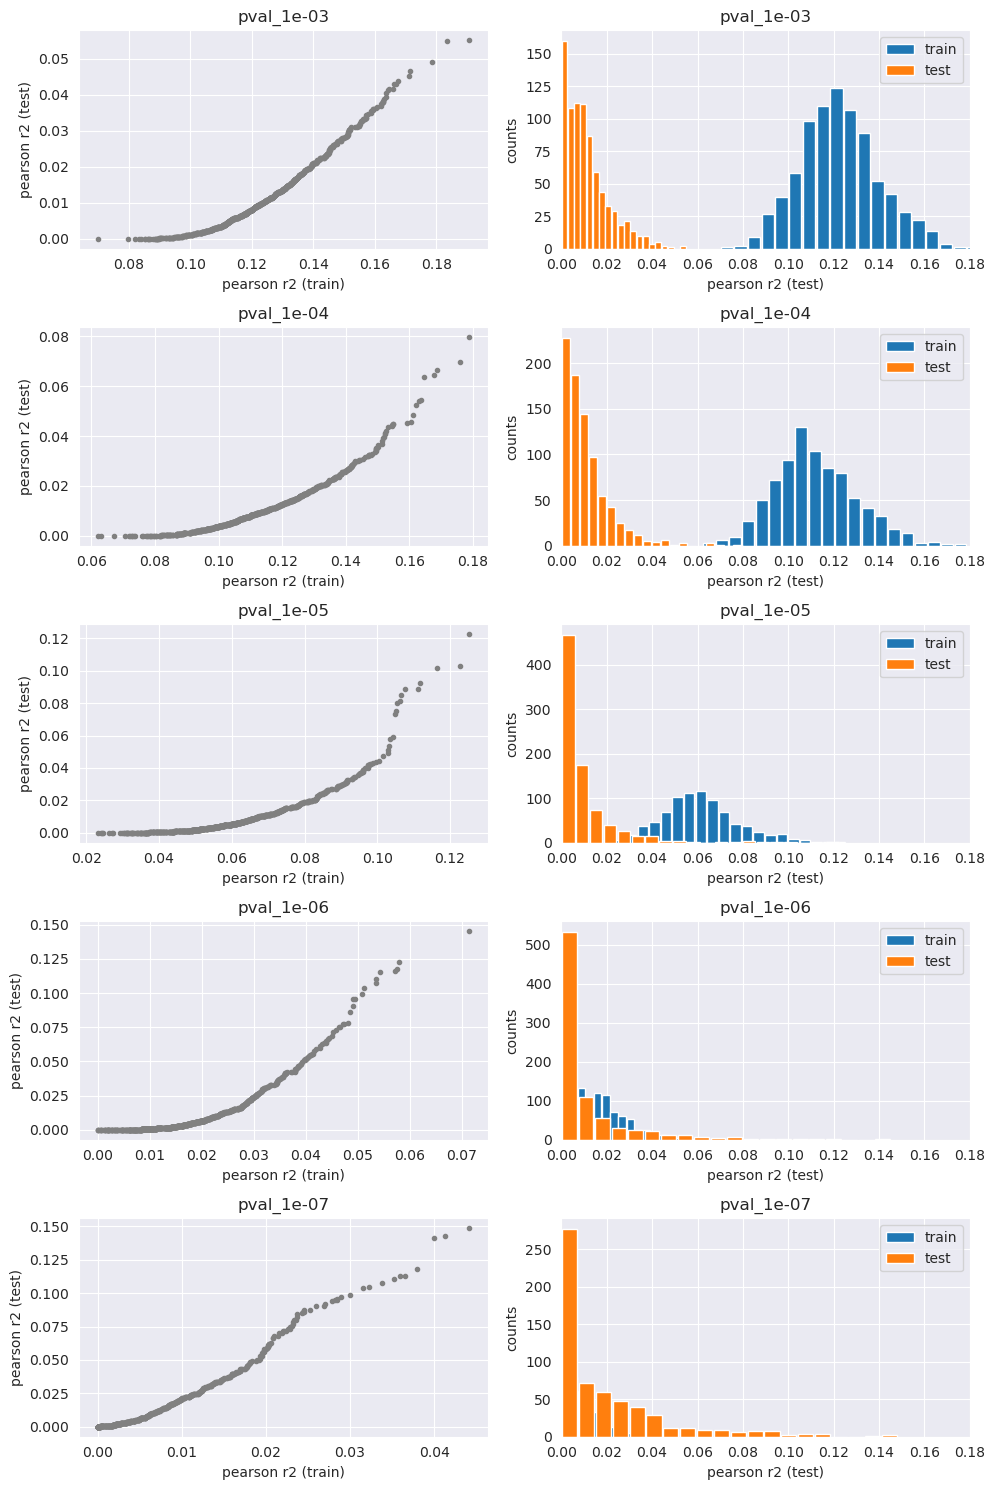

In [5]:

lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]
    
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10,15), dpi=100)
r = 0 # Row
for threshold in lst_threshold: 
    reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
    fn_train = f'merged_h2_r2_train_species_pval_{threshold}.txt'
    fn_test = f'merged_h2_r2_test_species_pval_{threshold}.txt'
    df_train = pd.read_csv(os.path.join(reuslt_dir, fn_train), sep='\t').sort_values(by='pearson_r2').set_index(keys='Lipid')
    df_test = pd.read_csv(os.path.join(reuslt_dir, fn_test), sep='\t').sort_values(by='pearson_r2').set_index(keys='Lipid')
    ax[r,0].plot(df_train['pearson_r2'], df_test['pearson_r2'], ls='', marker='.', c='grey')
    ax[r,0].set_xlabel('pearson r2 (train)')
    ax[r,0].set_ylabel('pearson r2 (test)')
    ax[r,0].set_title(f'pval_{threshold}')
    
    ax[r,1].hist(df_train['pearson_r2'], bins=20, rwidth=0.9, label='train')
    ax[r,1].hist(df_test['pearson_r2'], bins=20, rwidth=0.9, label='test')
    ax[r,1].set_xlabel('pearson r2 (test)')
    ax[r,1].set_ylabel('counts')
    ax[r,1].set_title(f'pval_{threshold}')
    ax[r,1].set_xlim(0, 0.18)
    ax[r,1].legend()
    r += 1
fig.tight_layout()
# fig.suptitle(f'pval_{threshold}')

### 1.1.2 Compare r2 of different pval threshold models

Text(0.5, 0, 'p value threshold')

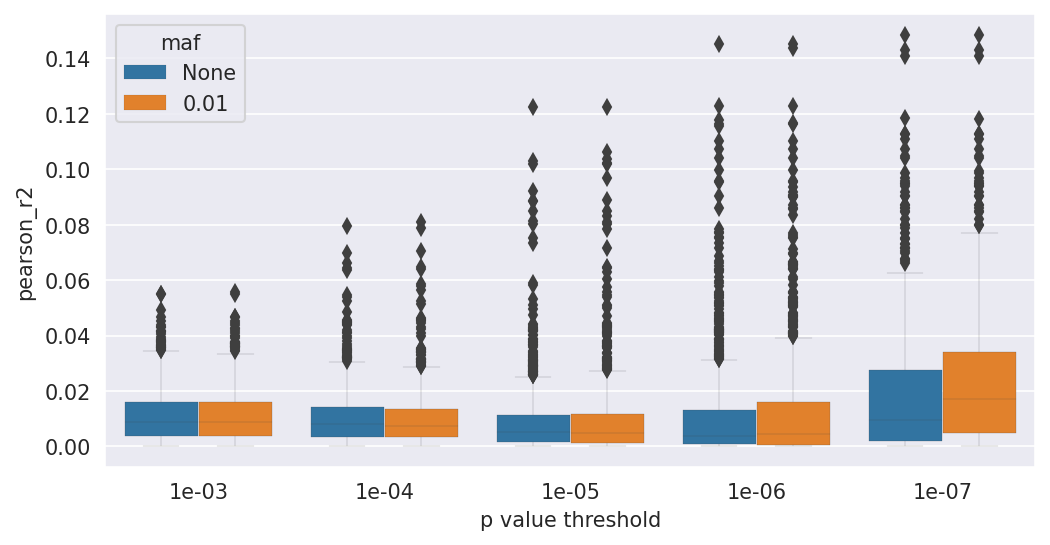

In [6]:
# Compare model performance with different SNP filtering criteria
lip_type = 'species'

lst_threshold = [f'1e-0{x}' for x in range(3, 8)]
lst_threshold_with_maf = [f'1e-0{x}_maf_0.01' for x in range(3, 8)]
fig, ax = plt.subplots(figsize=(8,4), dpi=150)
# Load h2 and pearson R2
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
lst_reuslt = []
for threshold in lst_threshold:
    resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
    df = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='pearson_r2')
    df['threshold'] = threshold
    df['maf'] = 'None'
    # display(df.head())
    lst_reuslt.append(df)
for threshold in lst_threshold_with_maf:
    resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
    df = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='pearson_r2')
    df['threshold'] = threshold.split('_maf_0.01')[0]
    df['maf'] = '0.01'
    # display(df.head())
    lst_reuslt.append(df)

df_all = pd.concat(lst_reuslt) # Merge all results
sns.boxplot(data=df_all, x='threshold', y='pearson_r2', hue='maf',
            linewidth=0.1, ax=ax)
ax.set_xlabel('p value threshold')

## 1.2 AdaBoost

### 1.2.1 Get pearson r2 of test run result


In [2]:
# Load AdaBoost result
result_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/AdaBoost/species/pval_1e-05'
lip_type='species'
lst_lipid, lst_r2, c = [], [], 0
for fn in os.listdir(result_dir):
    if fn.endswith('.log'):
        # Extract pearson r2 from log files
        # Already applied model on test set during training
        lipid = fn.split('.2024')[0]
        lst_lipid.append(lipid)
        with open(os.path.join(result_dir, fn)) as fh:
            for line in fh:
                if 'Pearson r2' in line:
                    r2 = line.strip().split(': ')[-1]
                    lst_r2.append(r2)
        c+=1
        print(f'\r# Processed {c}', end='', flush=True)
df_adb_r2 = pd.DataFrame({'Lipid_name':lst_lipid, 'pearson_r2':lst_r2})
df_adb_r2['pearson_r2'] = df_adb_r2['pearson_r2'].astype('float')

# Load elastic net result
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
threshold = '1e-05'
resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
# Reorder lipids
# Sort by heritability
df_elastic_net_r2 = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t').sort_values(by='h2')
df_adb_r2 = df_adb_r2.set_index(keys='Lipid_name').reindex(labels=df_elastic_net_r2['Lipid_name']).reset_index()

print('\n# Number of lipids pass in AdaBoost r2>0.05:',len(df_adb_r2[df_adb_r2['pearson_r2']>=0.05]))
print('# Number of lipids pass in Elastic net r2>0.05:',len(df_elastic_net_r2[df_elastic_net_r2['pearson_r2']>=0.05]))

# Processed 830
# Number of lipids pass in AdaBoost r2>0.05: 70
# Number of lipids pass in Elastic net r2>0.05: 15


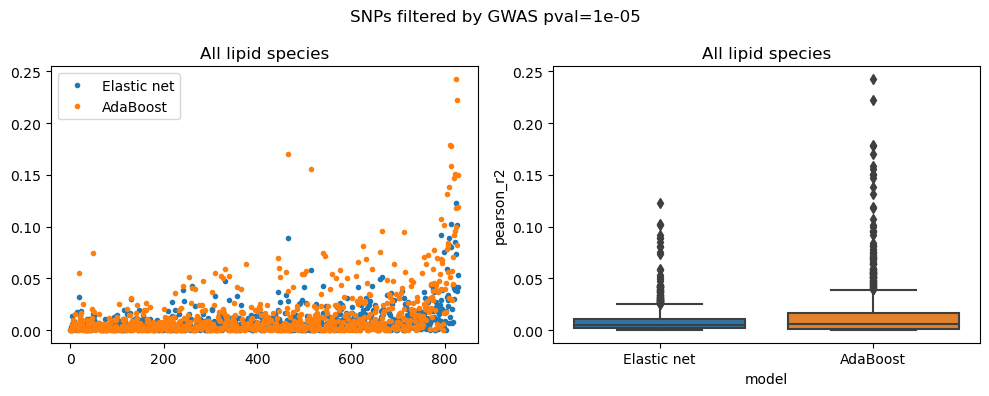

In [5]:
# Plot AdaBoost and Elastic net
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), dpi=100)
ax[0].plot(df_elastic_net_r2['pearson_r2'].values, ls='', marker='.', label='Elastic net')
ax[0].plot(df_adb_r2['pearson_r2'].astype('float'), ls='', marker='.', label='AdaBoost')
ax[0].legend()
ax[0].set_title('All lipid species')
df_adb_r2['model']='AdaBoost'
df_elastic_net_r2['model'] = 'Elastic net'
df_merged = pd.concat([df_elastic_net_r2[['Lipid_name', 'pearson_r2', 'model']], df_adb_r2])
df_merged['pearson_r2'] = df_merged['pearson_r2'].astype('float')
sns.boxplot(data=df_merged, x="model", y="pearson_r2", ax=ax[1])
ax[1].set_title('All lipid species')
fig.suptitle('SNPs filtered by GWAS pval=1e-05')
fig.tight_layout()

## 1.3 Gradient boosting

In [3]:
# Get person r2 from log files
gb_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/GradientBoosting/species'
lst_lipid, lst_gb_r2, c = [], [], 0
for fn in os.listdir(gb_dir):
    if fn.endswith('.log'):
        lipid = fn.split('.2024')[0]
        lst_lipid.append(lipid)
        with open(os.path.join(gb_dir, fn)) as fh:
            line = fh.readline().strip()
            while line != '':
                if 'Pearson r2 on test' in line:
                    pearson_r2 = float(line.split('Pearson r2 on test: ')[-1])
                    lst_gb_r2.append(pearson_r2)
                    break
                line = fh.readline().strip()
            c+=1
            print(f'\rProcessed: {c}', end='', flush=True)

df_gb_r2 = pd.DataFrame({'Lipid_name':lst_lipid, 'pearson_r2':lst_gb_r2})
df_gb_r2['pearson_r2'] = df_gb_r2['pearson_r2'].astype('float')
df_gb_r2.head()

Processed: 830

,Lipid_name,pearson_r2
0,PC-42:5-_-a-,0.0073
1,LPC-18:1-_[sn1],0.0077
2,FA-16:1-,0.0024
3,Cer-d19:1-26:0-,0.0348
4,S1P-d18:2-,0.0012


In [4]:
# Merge pearson r2 of different models and heritability
# Load elastic net result
reuslt_dir = '/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/elastic_net/merged_h2_r2'
threshold = '1e-05'
resutlt_fn = f'merged_h2_r2_test_{lip_type}_pval_{threshold}.txt'
# Reorder lipids
# Sort by heritability
df_elastic_net_r2 = pd.read_csv(os.path.join(reuslt_dir, resutlt_fn), sep='\t')[['Lipid_name', 'pearson_r2', 'h2']].rename(columns={'pearson_r2':'pearson_r2_elastic_net'})



df_boosting_result_h2_merged = df_adb_r2[['Lipid_name',
                                          'pearson_r2']].merge(df_gb_r2,
                                                               on='Lipid_name',
                                                               suffixes=('_adaB',
                                                                         '_gradient_boosting')).merge(df_elastic_net_r2,
                                                                                                      on='Lipid_name').sort_values(by='h2')

# output_fn = 'model_performance_ada_gradient_eln_pval_1e-05.txt'
# df_boosting_result_h2_merged.to_csv(f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/{output_fn}',
#                                     sep='\t', index=False)
df_boosting_result_h2_merged.columns=['Lipid_name', 'AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print('# Number of lipids with pearson r2>0.05:')
r2_threshold = 0.05
print('# - Elastic net:', (df_boosting_result_h2_merged['Elastic net']>r2_threshold).sum())
print('# - AdaBoost:',(df_boosting_result_h2_merged['AdaBoost']>r2_threshold).sum())
print('# - Gradient boosting:', (df_boosting_result_h2_merged['Gradient boosting']>r2_threshold).sum())
df_boosting_result_h2_merged.head()


# Number of lipids with pearson r2>0.05:
# - Elastic net: 15
# - AdaBoost: 70
# - Gradient boosting: 93


,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2
0,CE-18:2-,0.0005,0.0001,0.000497,0.000001
137,TG-49:1-_[SIM],0.0091,0.0018,0.003947,0.000001
138,DG-17:0_18:1-,0.0077,0.0108,0.002815,0.000001
139,TG-50:4-_[NL-18:3],0.0030,0.0160,0.010316,0.000001
140,TG-53:2-_[NL-18:1],0.0045,0.0064,0.004278,0.000001


# Mean person r2 (All lipid species)
- AdaBoost: 0.0153
- Gradient Boosting: 0.0205
- Elastic net: 0.0094
# Mean person r2 (filter by any h2>0.2)
- AdaBoost: 0.0282
- Gradient Boosting: 0.0373
- Elastic net: 0.0153
# Mean person r2 (filter by any pearson r2>0.05)
- AdaBoost: 0.0718
- Gradient Boosting: 0.0928
- Elastic net: 0.0339


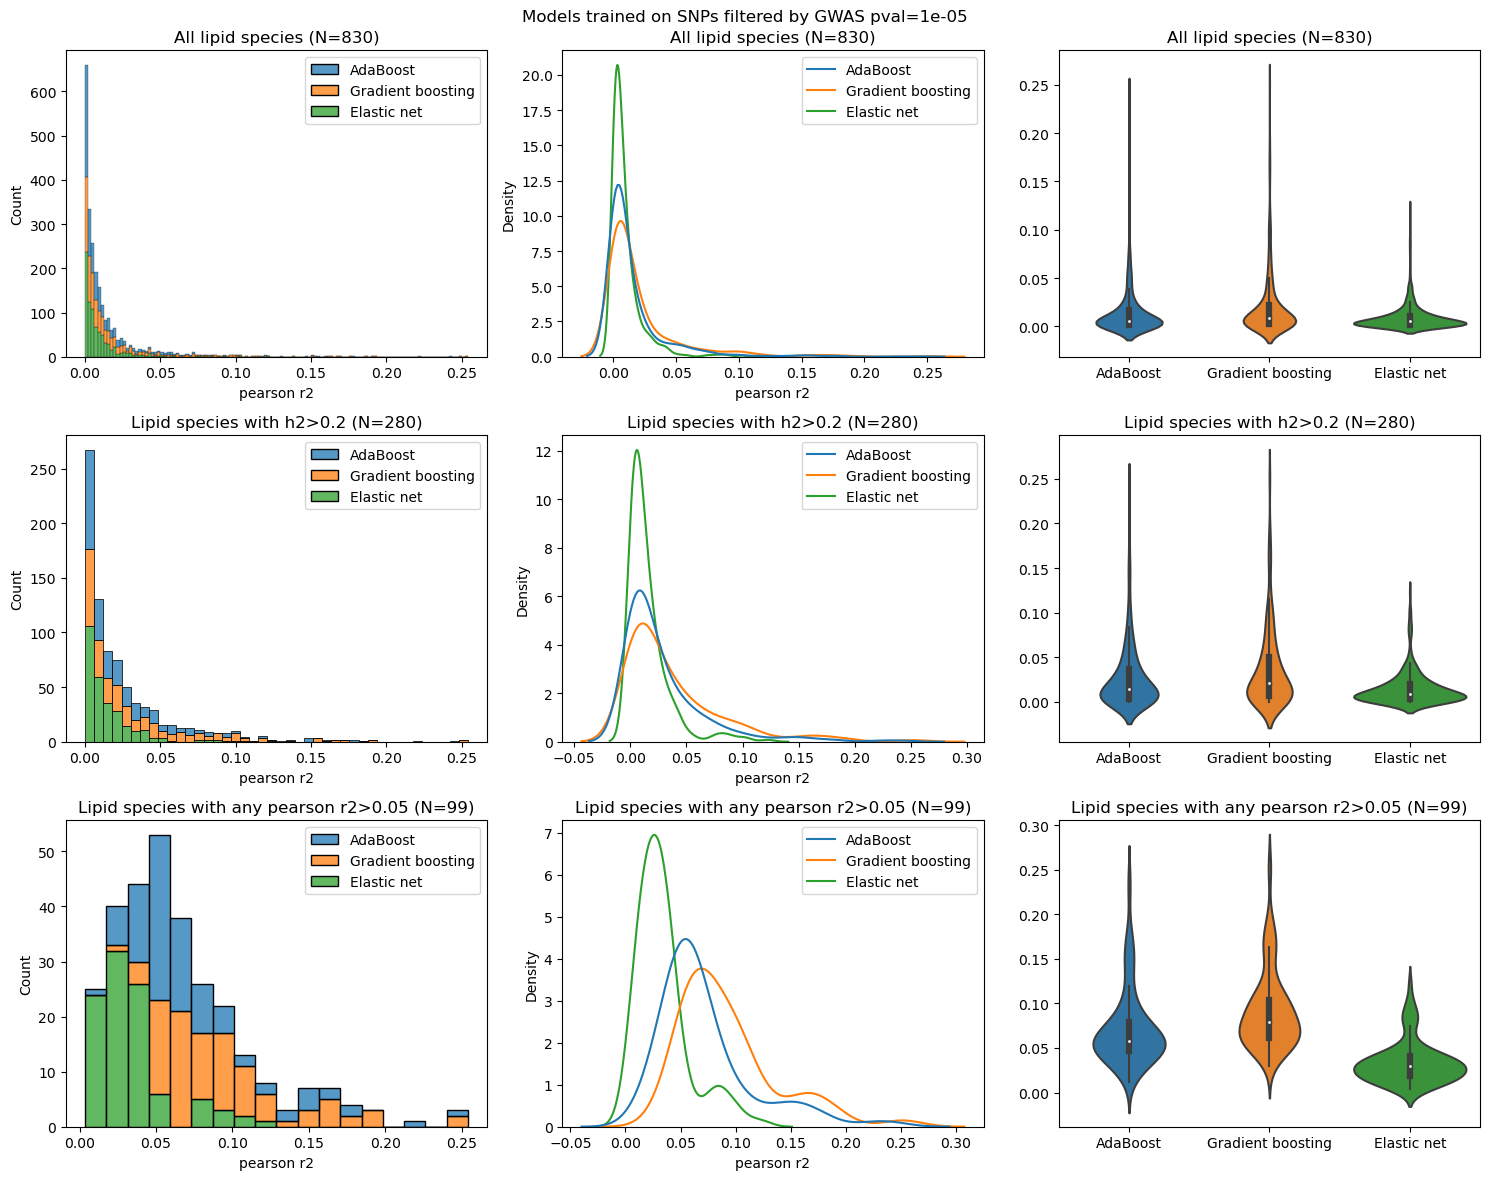

In [9]:
# Plot AdaBoost, gradient boosting and Elastic net
# df_boosting_result_h2_merged.columns=['Lipid_name', 'AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), dpi=100)

# sns.boxplot(data=df_merged, x="model", y="pearson_r2", ax=ax[0, 1])
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net']
print(f'# Mean person r2 (All lipid species)')
print('- AdaBoost: %.4f' % df_for_plot['AdaBoost'].mean())
print('- Gradient Boosting: %.4f' % df_for_plot['Gradient boosting'].mean())
print('- Elastic net: %.4f' % df_for_plot['Elastic net'].mean())

sns.histplot(data=df_boosting_result_h2_merged[cols_plot], multiple='stack', ax=ax[0,0])
ax[0,0].set_title(f'All lipid species (N={len(df_boosting_result_h2_merged)})')
ax[0,0].set_xlabel('pearson r2')
sns.kdeplot(data=df_boosting_result_h2_merged[cols_plot], ax=ax[0,1])
ax[0,1].set_title(f'All lipid species (N={len(df_boosting_result_h2_merged)})')
ax[0,1].set_xlabel('pearson r2')
sns.violinplot(data=df_boosting_result_h2_merged[cols_plot], ax=ax[0, 2])
ax[0,2].set_title(f'All lipid species (N={len(df_boosting_result_h2_merged)})')

# ######## Filter by heritability h2>0.2 ########
h2_threshold = 0.2
h2_mask = df_boosting_result_h2_merged['h2']>h2_threshold
print(f'# Mean person r2 (filter by any h2>{h2_threshold})')
print('- AdaBoost: %.4f' % df_for_plot[h2_mask]['AdaBoost'].mean())
print('- Gradient Boosting: %.4f' % df_for_plot[h2_mask]['Gradient boosting'].mean())
print('- Elastic net: %.4f' % df_for_plot[h2_mask]['Elastic net'].mean())

sns.histplot(data=df_boosting_result_h2_merged[h2_mask][cols_plot], multiple='stack', ax=ax[1,0])
ax[1,0].set_title(f'Lipid species with h2>{h2_threshold} (N={len(df_boosting_result_h2_merged[h2_mask])})')
ax[1,0].set_xlabel('pearson r2')
sns.kdeplot(data=df_boosting_result_h2_merged[h2_mask][cols_plot], ax=ax[1,1])
ax[1,1].set_title(f'Lipid species with h2>{h2_threshold} (N={len(df_boosting_result_h2_merged[h2_mask])})')
ax[1,1].set_xlabel('pearson r2')
sns.violinplot(data=df_boosting_result_h2_merged[h2_mask][cols_plot], ax=ax[1, 2])
ax[1,2].set_title(f'Lipid species with h2>{h2_threshold} (N={len(df_boosting_result_h2_merged[h2_mask])})')


# ######## Filter by pearson r2>0.05 (combined of ada, gradient and eln) ########
r2_threshold=0.05
r2_mask = (df_boosting_result_h2_merged['AdaBoost']>r2_threshold) | (df_boosting_result_h2_merged['Gradient boosting']>r2_threshold) | (df_boosting_result_h2_merged['Elastic net']>r2_threshold)
print(f'# Mean person r2 (filter by any pearson r2>{r2_threshold})')
print('- AdaBoost: %.4f' % df_for_plot[r2_mask]['AdaBoost'].mean())
print('- Gradient Boosting: %.4f' % df_for_plot[r2_mask]['Gradient boosting'].mean())
print('- Elastic net: %.4f' % df_for_plot[r2_mask]['Elastic net'].mean())

sns.histplot(data=df_boosting_result_h2_merged[r2_mask][cols_plot], multiple='stack', ax=ax[2,0])
ax[2,0].set_title(f'Lipid species with any pearson r2>{r2_threshold} (N={len(df_boosting_result_h2_merged[r2_mask])})')
ax[2,0].set_xlabel('pearson r2')
sns.kdeplot(data=df_boosting_result_h2_merged[r2_mask][cols_plot], ax=ax[2,1])
ax[2,1].set_title(f'Lipid species with any pearson r2>{r2_threshold} (N={len(df_boosting_result_h2_merged[r2_mask])})')
ax[2,1].set_xlabel('pearson r2')
sns.violinplot(data=df_boosting_result_h2_merged[r2_mask][cols_plot], ax=ax[2, 2])
ax[2,2].set_title(f'Lipid species with any pearson r2>{r2_threshold} (N={len(df_boosting_result_h2_merged[r2_mask])})')

fig.suptitle('Models trained on SNPs filtered by GWAS pval=1e-05')
fig.tight_layout()

# 2. Cluster heatmaps

In [2]:
# Load data saved above
output_fn = 'model_performance_ada_gradient_eln_pval_1e-05.txt'
df_boosting_result_h2_merged = pd.read_csv(f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/{output_fn}',
                                           sep='\t').rename(columns={'pearson_r2_adaB':'AdaBoost',
                                                                     'pearson_r2_gradient_boosting':'Gradient boosting',
                                                                     'pearson_r2_elastic_net':'Elastic net'})
df_boosting_result_h2_merged.head()

,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2
0,CE-18:2-,0.0005,0.0001,0.000497,0.000001
1,TG-49:1-_[SIM],0.0091,0.0018,0.003947,0.000001
2,DG-17:0_18:1-,0.0077,0.0108,0.002815,0.000001
3,TG-50:4-_[NL-18:3],0.0030,0.0160,0.010316,0.000001
4,TG-53:2-_[NL-18:1],0.0045,0.0064,0.004278,0.000001


### 2.1 Cluster heatmap with/without h2 or r2 filter

In [39]:
cols_plot

['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']

Scaled pearson r2 of all lipid species (N=830)


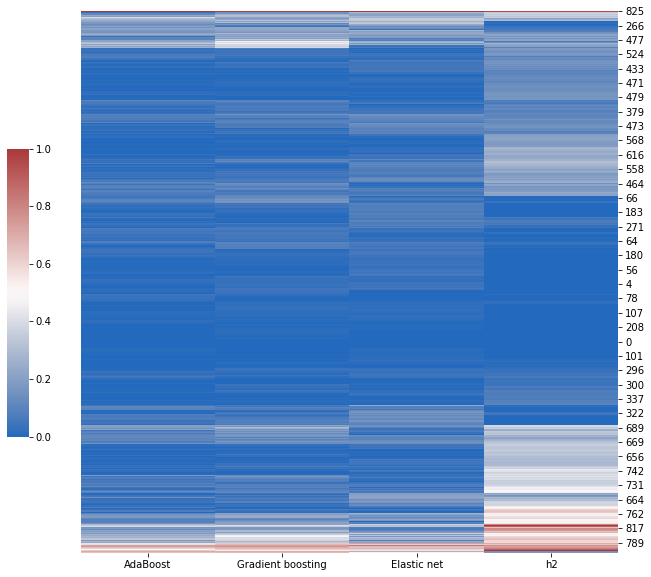

In [51]:
# Cluster pearson r2, no filter
df_for_plot = df_boosting_result_h2_merged.copy()
df_for_plot['h2_scaled'] = df_for_plot['h2']*0.25 # Need to shrink h2 so otherwise h2 is too large compare to r2
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
print(f'Scaled pearson r2 of all lipid species (N={len(df_for_plot)})')
cg = sns.clustermap(data=df_for_plot[cols_plot],
                    col_cluster=False,cmap="vlag",
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

Scaled pearson r2, lipid species with h2>0.2 (N=280)


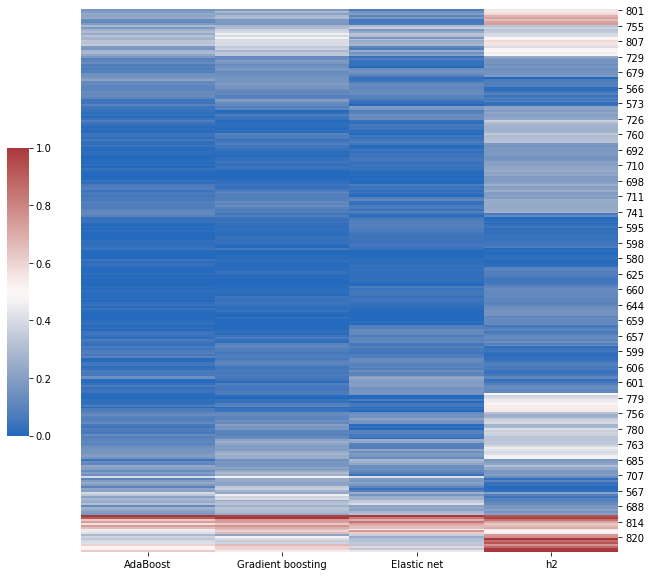

In [11]:
# Cluster pearson r2, filter by h2
h2_threshold = 0.2
h2_mask = df_for_plot['h2']>h2_threshold
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
print(f'Scaled pearson r2, lipid species with h2>{h2_threshold} (N={len(df_for_plot[h2_mask])})')
cg = sns.clustermap(data=df_for_plot[h2_mask][cols_plot],
                    col_cluster=False, cmap="vlag",
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)


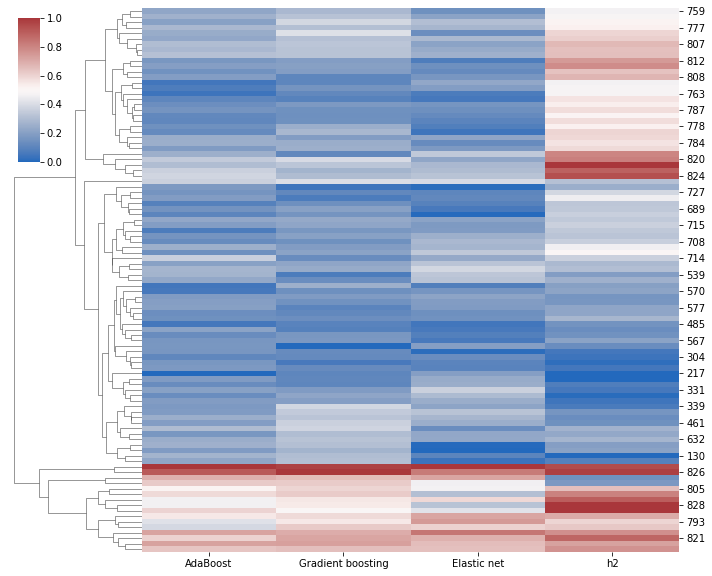

Raw pearson r2, lipid species with any pearson r2>0.05 (N=99)


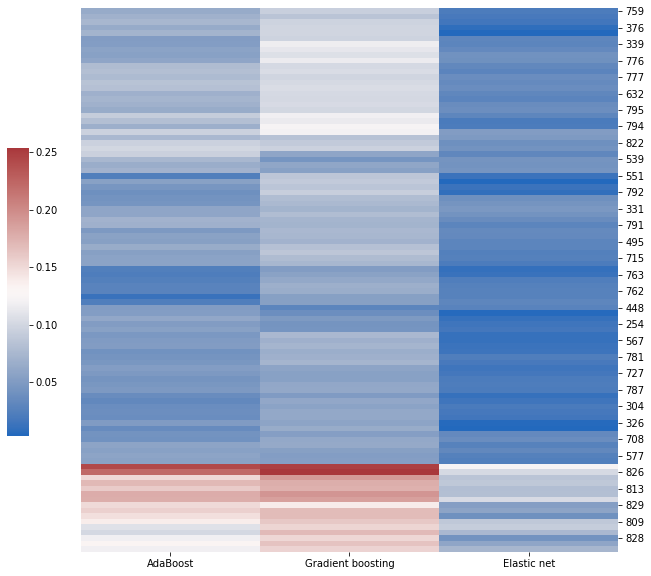

In [246]:
# Cluster pearson r2
r2_threshold = 0.05
r2_mask = (df_for_plot['AdaBoost']>r2_threshold) | (df_for_plot['Gradient boosting']>r2_threshold) | (df_for_plot['Elastic net']>r2_threshold)
print(f'Scaled pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot],
                    col_cluster=False,cmap="vlag",
                    standard_scale=1,
                    cbar_pos=(0.03, 0.58, .03, .2))
# cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

print(f'Raw pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot],
                    col_cluster=False,cmap="vlag",
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

Raw pearson r2, lipid species with any pearson r2>0.05 (N=99)
Sort by gradient boosting


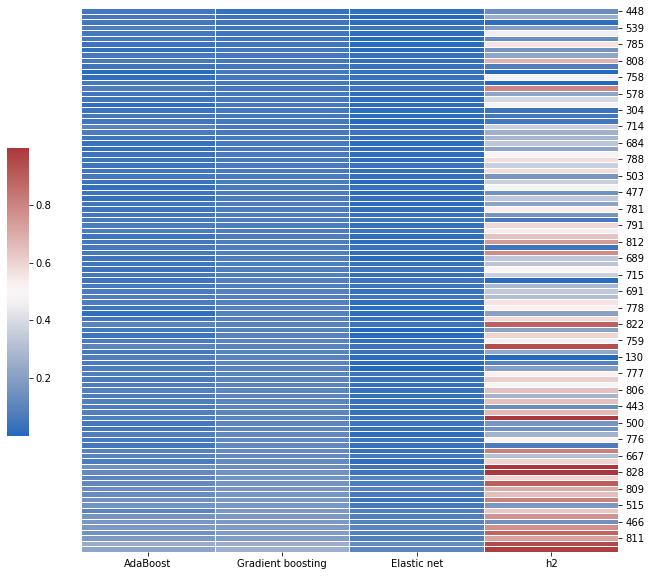

In [18]:
print(f'Raw pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
print('Sort by gradient boosting')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot].sort_values(by=['Gradient boosting']),
                    col_cluster=False,row_cluster=False,
                    cmap="vlag",linewidths=.5,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)
Sort by r2 of AdaBoost


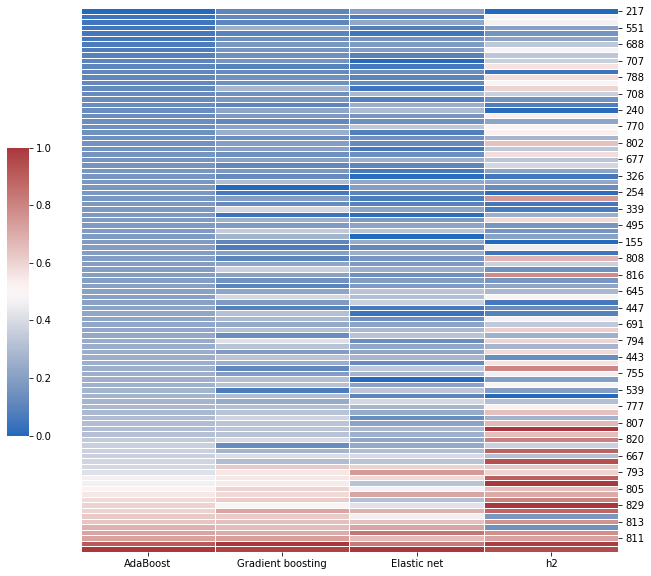

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)
Sort by r2 of gradiaent boosting


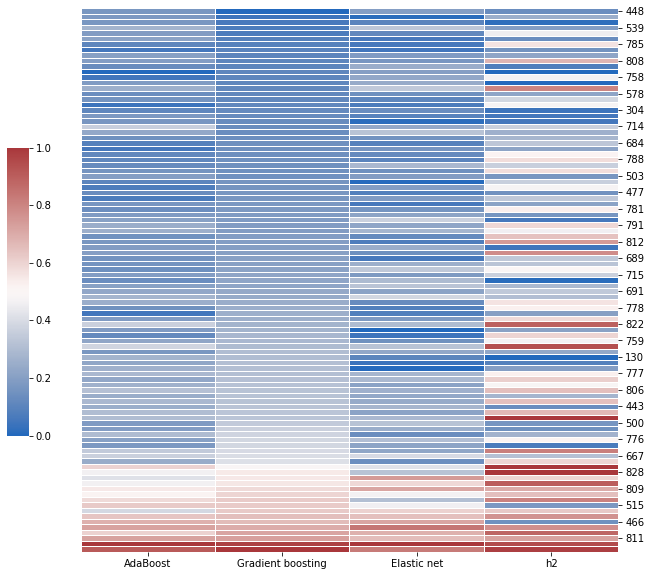

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)
Sort by h2


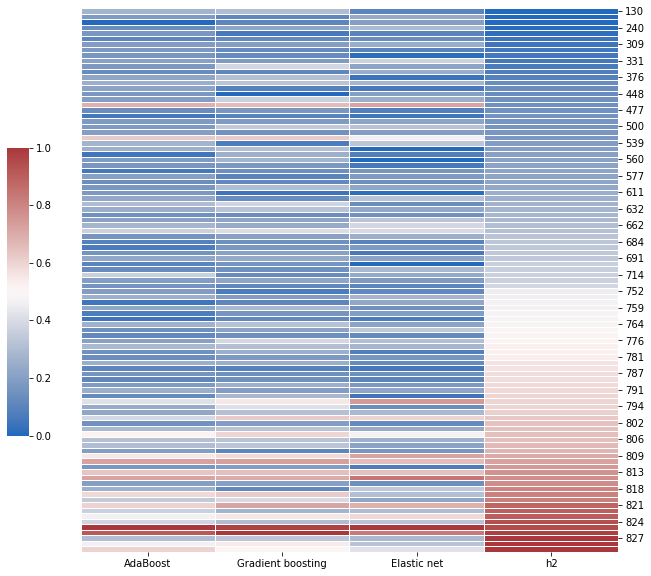

Raw pearson r2, lipid species with any pearson r2>0.05 (N=99)
Sort by AdaBoost


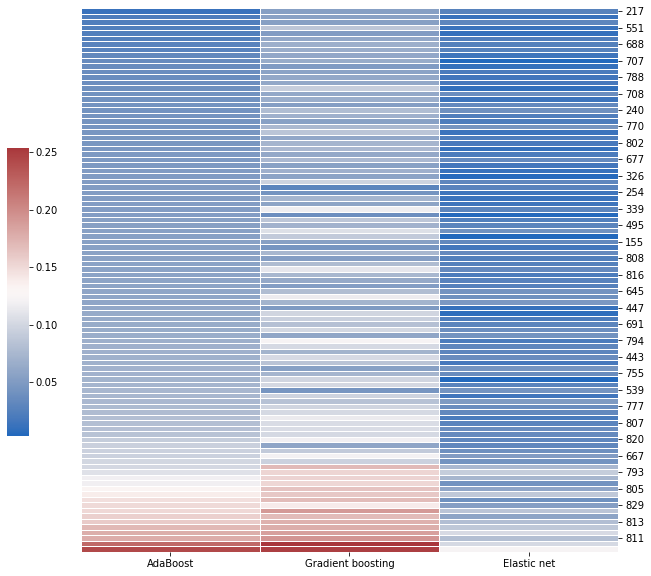

Raw pearson r2, lipid species with any pearson r2>0.05 (N=99)
Sort by gradient boosting


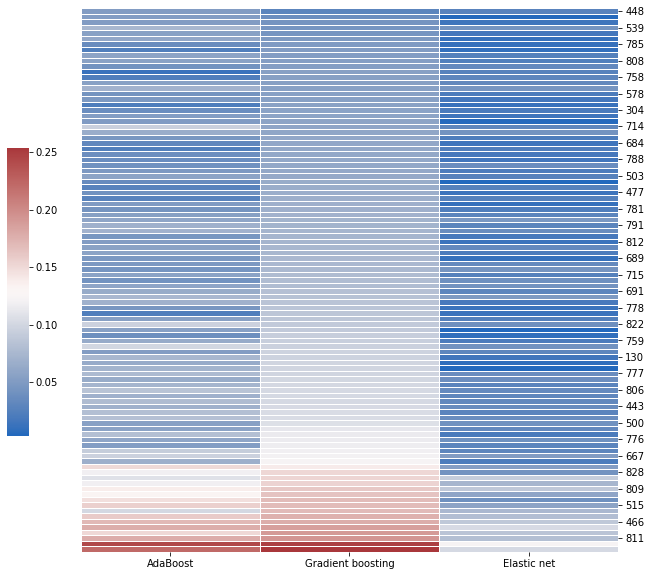

In [251]:
print(f'Scaled pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
print('Sort by r2 of AdaBoost')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot].sort_values(by=['AdaBoost']),
                    col_cluster=False,row_cluster=False,
                    cmap="vlag",linewidths=.5,
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4)) # cbar_pos=(0.03, 0.58, .03, .2)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

print(f'Scaled pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
print('Sort by r2 of gradiaent boosting')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot].sort_values(by=['Gradient boosting']),
                    col_cluster=False,row_cluster=False,
                    cmap="vlag",linewidths=.5,
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

print(f'Scaled pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
print('Sort by h2')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot].sort_values(by=['h2']),
                    col_cluster=False,row_cluster=False,
                    cmap="vlag",linewidths=.5,
                    standard_scale=1,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

# ########### Raw r2 ###########
print(f'Raw pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
print('Sort by AdaBoost')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot].sort_values(by=['AdaBoost']),
                    col_cluster=False,row_cluster=False,
                    cmap="vlag",linewidths=.5,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()

print(f'Raw pearson r2, lipid species with any pearson r2>{r2_threshold} (N={len(df_for_plot[r2_mask])})')
print('Sort by gradient boosting')
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net']
cg = sns.clustermap(data=df_for_plot[r2_mask][cols_plot].sort_values(by=['Gradient boosting']),
                    col_cluster=False,row_cluster=False,
                    cmap="vlag",linewidths=.5,
                    cbar_pos=(0.1, .2, .03, .4))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.show()



### 2.2 Cluster heatmap with lipid class info

In [53]:
# Load lipid species and cluster mapsort
fn = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/lipidomic_measures/lipid_class_species_mapping_add_missing_species_PCO42-7.txt'
df_mapping = pd.read_csv(fn, sep='\t')
df_mapping['Lipid_name'] = df_mapping['Lipid Name'].apply(lambda x: x.replace('\\', '-').replace('/', '-').replace('(','-').replace(')','-').replace(' ', '_'))

# Create color map
df_for_plot = df_boosting_result_h2_merged.copy()
df_for_plot = df_for_plot.merge(df_mapping, on='Lipid_name')
# Create a categorical palette to identify lipid classes
network_pal = sns.husl_palette(49) # 49 lipid classes in total
lip_class = df_for_plot['Lipid Class'].unique() # Get unique lipid classes
lip_class.sort()
network_lut = dict(zip(lip_class, network_pal))

Scaled pearson r2, all lipid species (N=830)


(0.7, 7.3, 3.7, 10.3)

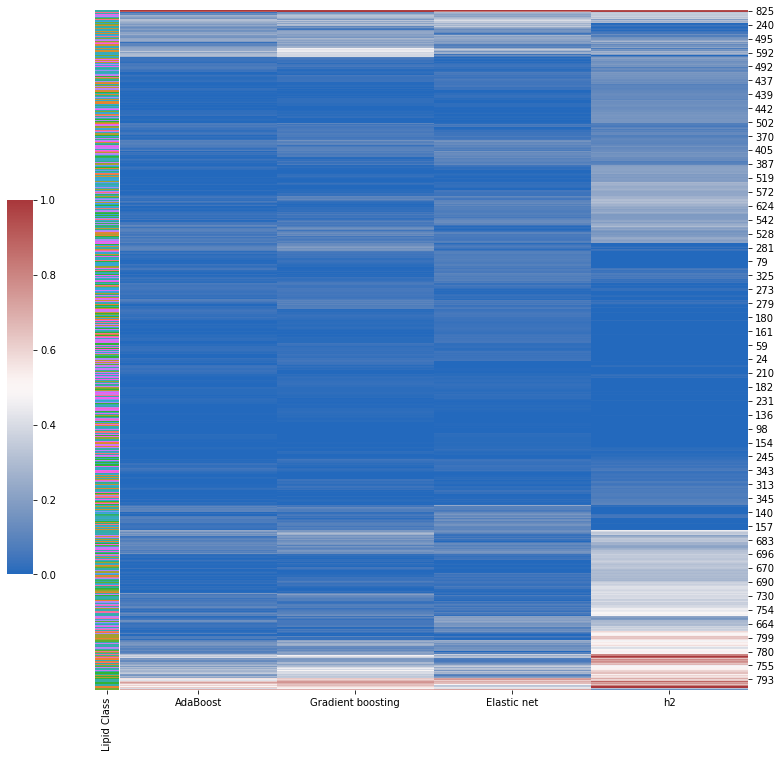

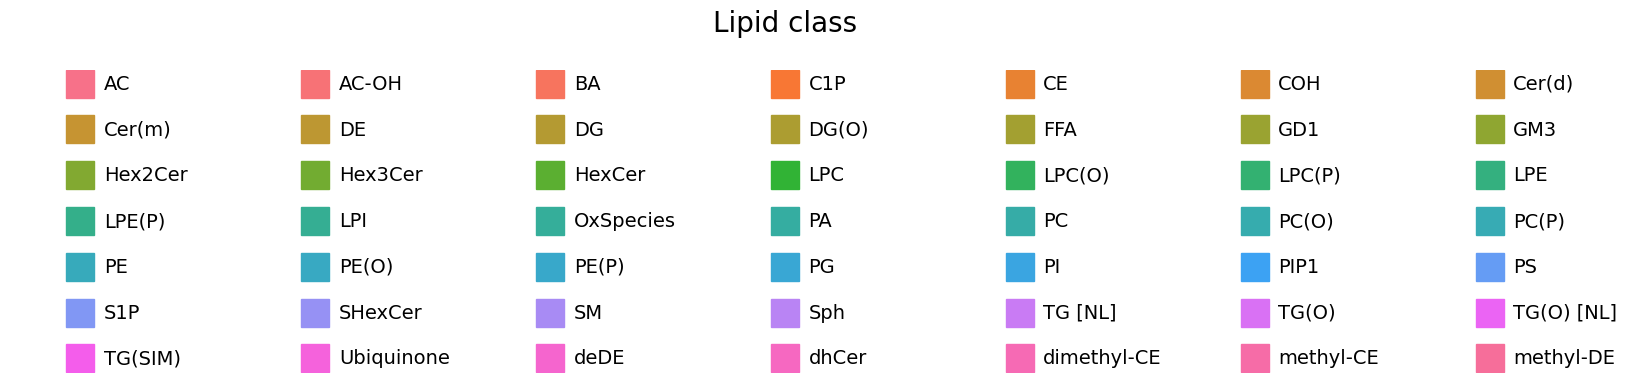

In [158]:
# Convert the palette to vectors that will be drawn on the side of the matrix
network_colors = df_for_plot['Lipid Class'].map(network_lut)

cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print(f'Scaled pearson r2, all lipid species (N={len(df_for_plot)})')

g = sns.clustermap(df_for_plot[cols_plot], cmap="vlag",
                   row_colors=network_colors,
                   figsize=(12, 13),
                   col_cluster=False, standard_scale=1,
                   cbar_pos=(0.1, .2, .03, .4))
g.ax_col_dendrogram.remove()
g.ax_row_dendrogram.remove()

# ################## Plot color vs. lipid class names ##################
df_for_plot['color'] = df_for_plot['Lipid Class'].map(network_lut).values
df_subset_color_no_dup = df_for_plot.drop_duplicates(subset='color')
plt.figure(figsize=(20, 4), dpi=100)
x_val = 1
y = 10
for lip in df_subset_color_no_dup.sort_values(by='Lipid Class')['Lipid Class']:
    plt.plot(x_val, y,
             c=df_subset_color_no_dup[df_subset_color_no_dup['Lipid Class']==lip]['color'].values[0],
             marker='s', markersize=20)
    plt.annotate(text=lip, xy=(x_val+0.1, y-0.12), fontsize=14)
    x_val += 1
    if x_val==8:
        y -= 1
        x_val = 1
plt.title('Lipid class', fontsize=20, y=1.1)
plt.axis('off')

Scaled pearson r2, lipid species with h2>0.2 (N=280)


(0.8, 5.2, 3.7, 10.3)

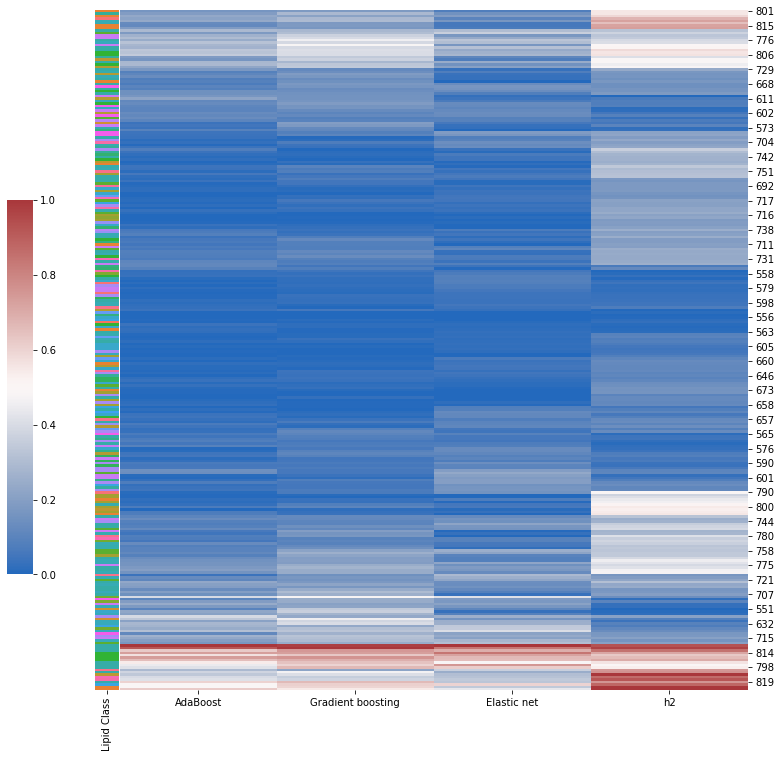

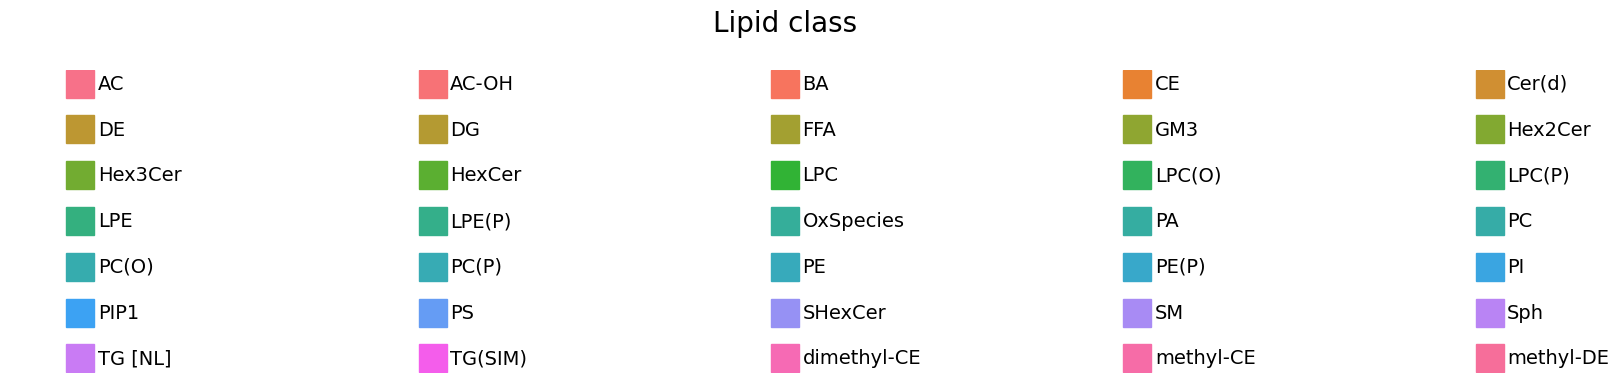

In [56]:
df_subset = df_for_plot[h2_mask].copy()
# Convert the palette to vectors that will be drawn on the side of the matrix
network_colors = df_subset['Lipid Class'].map(network_lut)

cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print(f'Scaled pearson r2, lipid species with h2>0.2 (N={len(df_subset)})')

g = sns.clustermap(df_subset[cols_plot], cmap="vlag",
                   row_colors=network_colors,
                   figsize=(12, 13),
                   col_cluster=False, standard_scale=1,
                   cbar_pos=(0.1, .2, .03, .4))
g.ax_col_dendrogram.remove()
g.ax_row_dendrogram.remove()

# ################## Plot color vs. lipid class names ##################
df_subset['color'] = df_subset['Lipid Class'].map(network_lut).values
df_subset_color_no_dup = df_subset.drop_duplicates(subset='color')
plt.figure(figsize=(20, 4), dpi=100)
x_val = 1
y = 10
for lip in df_subset_color_no_dup.sort_values(by='Lipid Class')['Lipid Class']:
    plt.plot(x_val, y,
             c=df_subset_color_no_dup[df_subset_color_no_dup['Lipid Class']==lip]['color'].values[0],
             marker='s', markersize=20)
    plt.annotate(text=lip, xy=(x_val+0.05, y-0.12), fontsize=14)
    x_val += 1
    if x_val==6:
        y -= 1
        x_val = 1
plt.title('Lipid class', fontsize=20, y=1.1)
plt.axis('off')

Scaled pearson r2, lipid species with any pearson r2>0.05 (N=99)


(0.8, 5.2, 5.8, 10.2)

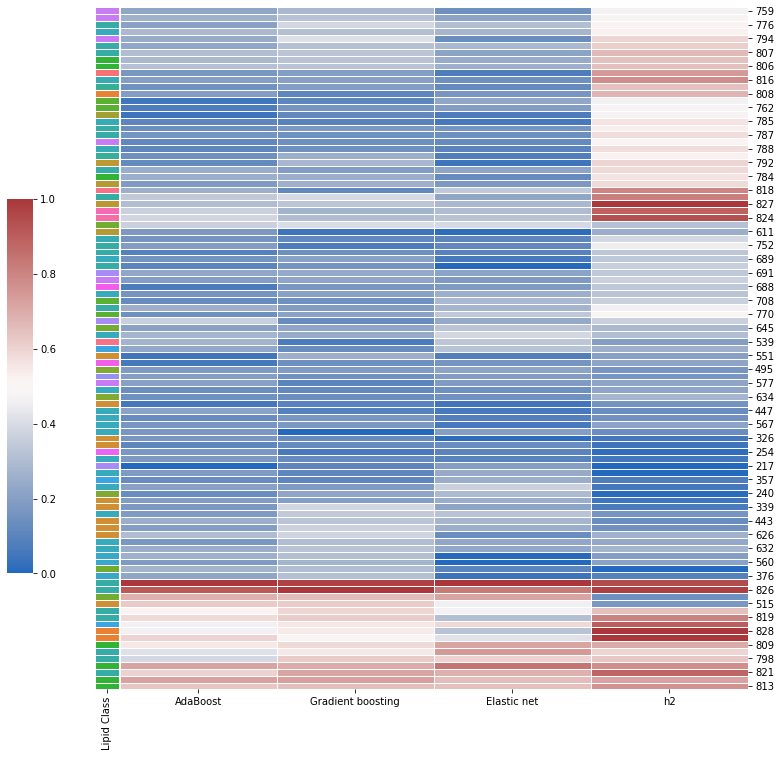

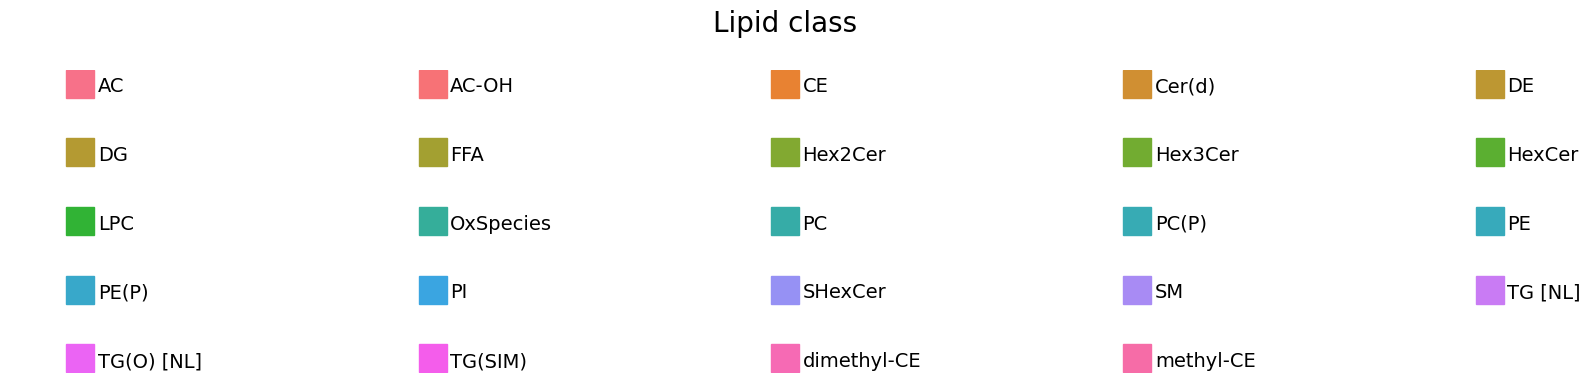

In [29]:
df_subset = df_for_plot[r2_mask].copy()
# Convert the palette to vectors that will be drawn on the side of the matrix
network_colors = df_subset['Lipid Class'].map(network_lut)

cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
print(f'Scaled pearson r2, lipid species with any pearson r2>0.05 (N={len(df_subset)})')

g = sns.clustermap(df_subset[cols_plot], cmap="vlag",
                   row_colors=network_colors,
                   linewidths=.5, figsize=(12, 13),
                   col_cluster=False, standard_scale=1,
                   cbar_pos=(0.1, .2, .03, .4))
g.ax_col_dendrogram.remove()
g.ax_row_dendrogram.remove()

# ################## Plot color vs. lipid class names ##################
df_subset['color'] = df_subset['Lipid Class'].map(network_lut).values
df_subset_color_no_dup = df_subset.drop_duplicates(subset='color')
plt.figure(figsize=(20, 4), dpi=100)
x_val = 1
y = 10
for lip in df_subset_color_no_dup.sort_values(by='Lipid Class')['Lipid Class']:
    plt.plot(x_val, y,
             c=df_subset_color_no_dup[df_subset_color_no_dup['Lipid Class']==lip]['color'].values[0],
             marker='s', markersize=20)
    plt.annotate(text=lip, xy=(x_val+0.05, y-0.12), fontsize=14)
    x_val += 1
    if x_val==6:
        y -= 1
        x_val = 1
plt.title('Lipid class', fontsize=20, y=1.1)
plt.axis('off')

# 3. Check GWAS results of lipid species with high h2 but low r2

In [80]:
# Load performance data saved above
output_fn = 'model_performance_ada_gradient_eln_pval_1e-05.txt'
df_boosting_result_h2_merged = pd.read_csv(f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/{output_fn}',
                                           sep='\t').rename(columns={'pearson_r2_adaB':'AdaBoost',
                                                                     'pearson_r2_gradient_boosting':'Gradient boosting',
                                                                     'pearson_r2_elastic_net':'Elastic net'})
df_boosting_result_h2_merged.head(2)

,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2
0,CE-18:2-,0.0005,0.0001,0.000497,0.000001
1,TG-49:1-_[SIM],0.0091,0.0018,0.003947,0.000001


In [190]:
# Cannot get the same lables from the dendrogram function, so use labels from the clustermap directly
'''
# Cluster heatmap used linkage in scipy to create clusters
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
cols = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
Z = linkage(df_boosting_result_h2_merged[cols], method='average') # Calcualte cluster matrix as in seaborn clustermap (worked and matched)
dn = dendrogram(Z) # Labels in this step is different from clustermap
'''

## 3.1 Get new orders from seaborn clustermap

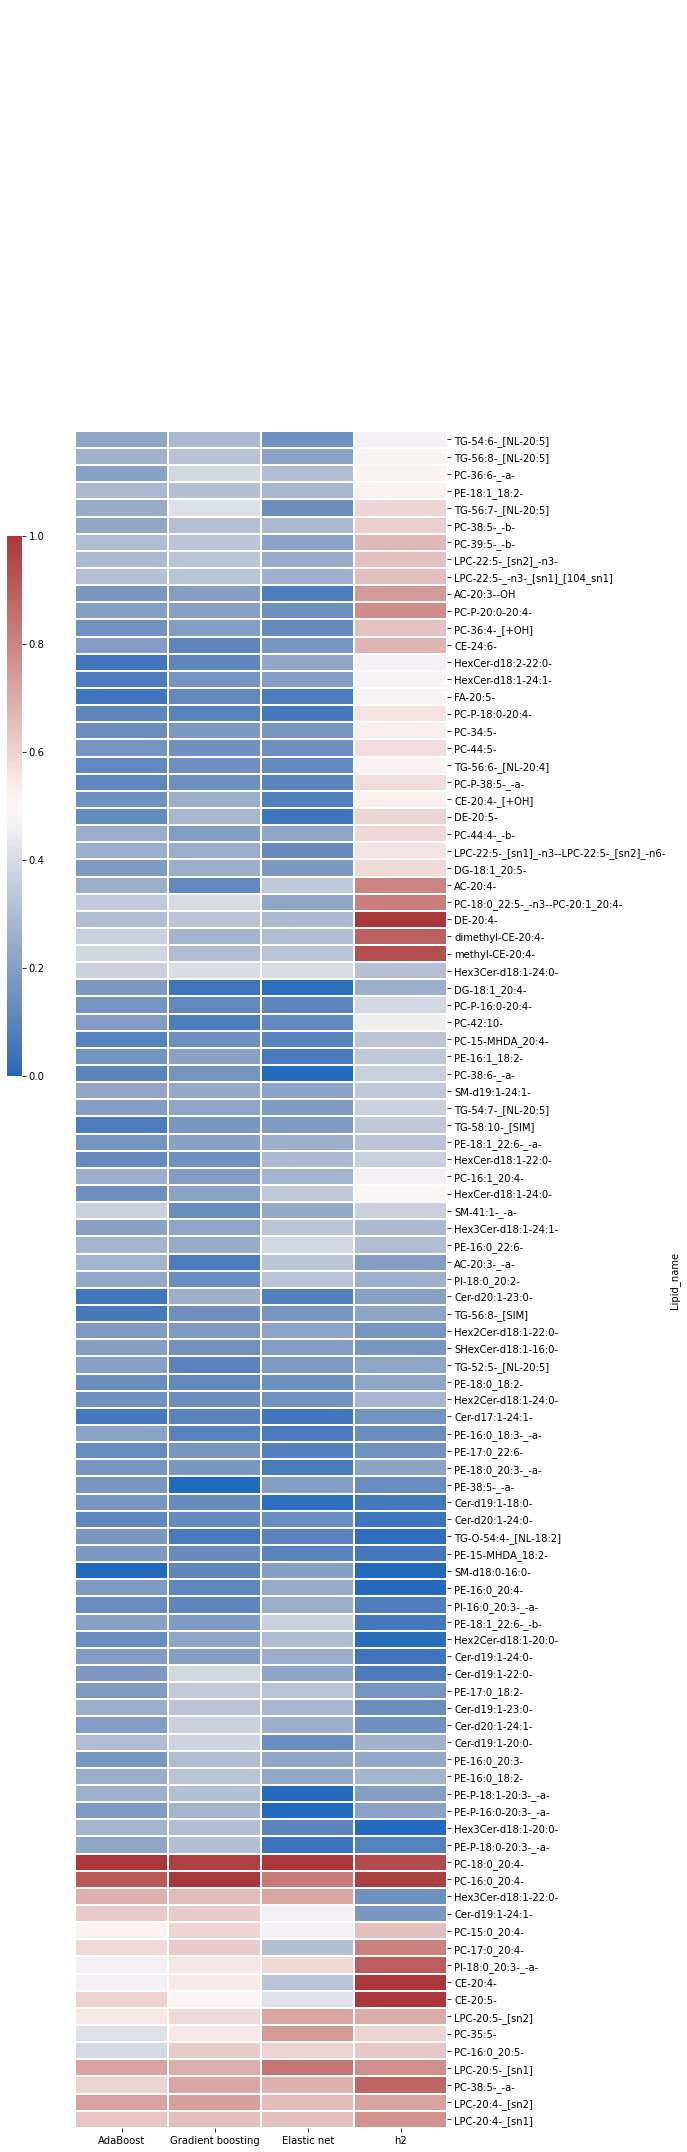

In [94]:
# Get new order from clustermap

# Cluster pearson r2, filter by any perason r2>0.05
r2_threshold = 0.05
r2_mask = (df_boosting_result_h2_merged['AdaBoost']>r2_threshold) | (df_boosting_result_h2_merged['Gradient boosting']>r2_threshold) | (df_boosting_result_h2_merged['Elastic net']>r2_threshold)
df_filtered_by_r2 = df_boosting_result_h2_merged[r2_mask].copy()
# df_filtered_by_r2.set_index(keys='Lipid_name', inplace=True)
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
cg = sns.clustermap(data=df_filtered_by_r2.set_index(keys='Lipid_name')[cols_plot],lw=0.005,
                    figsize=(10,30), col_cluster=False,
                    cmap="vlag", cbar_pos=(0.05, .5, .02, .25),
                    standard_scale=1)
cg.ax_row_dendrogram.set_visible(False)
df_filtered_by_r2['clustermap_order'] = cg.dendrogram_row.reordered_ind
df_filtered_by_r2.reset_index(inplace=True)
# df_filtered_by_r2.sort_values(by='clustermap_order', inplace=True)

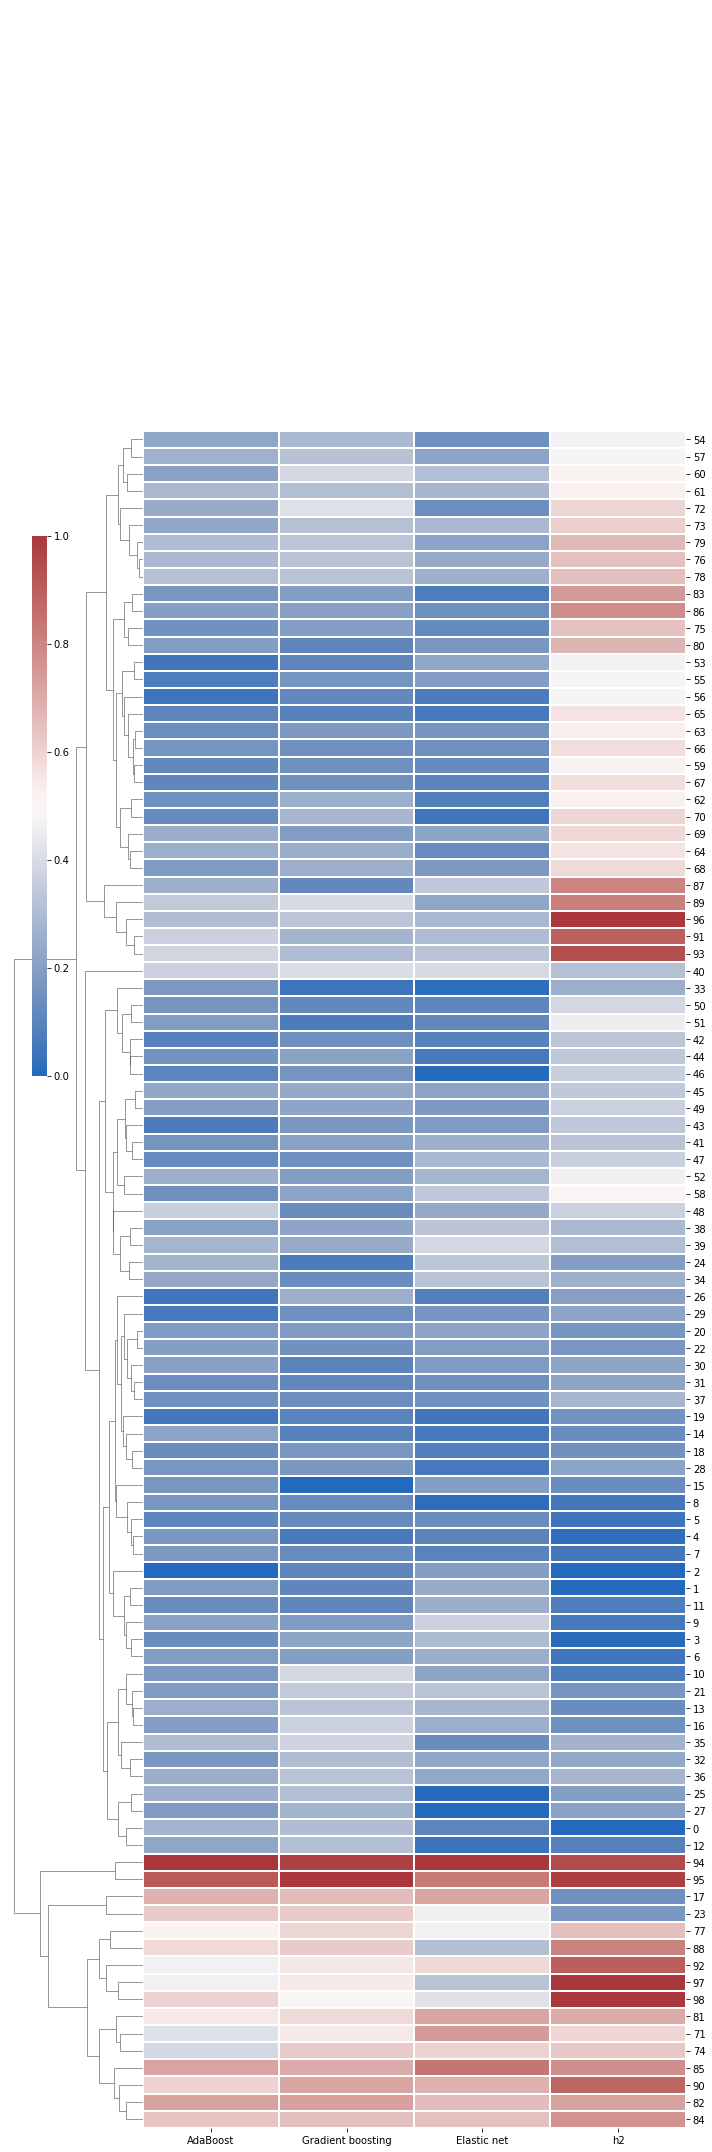

In [4]:
cols_plot = ['AdaBoost', 'Gradient boosting', 'Elastic net','h2']
cg = sns.clustermap(data=df_filtered_by_r2[cols_plot],lw=0.005,
                    figsize=(10,30), col_cluster=False,
                    cmap="vlag", cbar_pos=(0.05, .5, .02, .25),
                    standard_scale=1)
# cg.ax_row_dendrogram.set_visible(False)

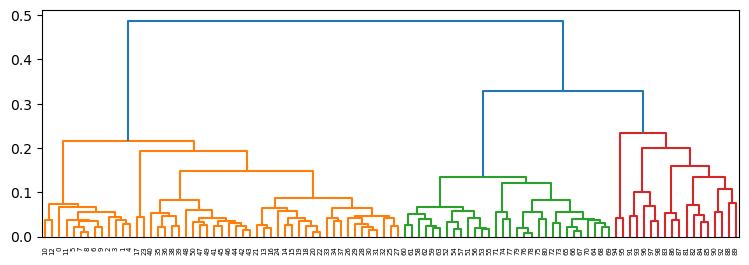

In [95]:
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
cols = ['AdaBoost', 'Gradient boosting', 'Elastic net', 'h2']
Z = linkage(df_filtered_by_r2[cols], method='average') # Calcualte cluster matrix as in seaborn clustermap (worked and matched)
# plt.figure(figsize=(3,9),dpi=300)
# Issue: Labels in this step is different from clustermap
# dn = dendrogram(Z, orientation='left',
#                 above_threshold_color='#AAAAAA',
#                 color_threshold=0.5)

plt.figure(figsize=(9,3),dpi=100)

dn = dendrogram(Z, color_threshold=0.3) # eyeball color_threshold from y axis

In [74]:
for k, v in dn.items():
    print(f'# {k}: length={len(v)}')
    print(v[:2])

# icoord: length=98
[[5.0, 5.0, 15.0, 15.0], [55.0, 55.0, 65.0, 65.0]]
# dcoord: length=98
[[0.0, 0.037078647387385484, 0.037078647387385484, 0.0], [0.0, 0.010407002192820166, 0.010407002192820166, 0.0]]
# ivl: length=99
['72', '82']
# leaves: length=99
[72, 82]
# color_list: length=98
['C1', 'C1']
# leaves_color_list: length=99
['C1', 'C1']


In [96]:
# get group from dn
# Use dn['leaves_color_list'] for grouping
df_filtered_by_r2 = df_filtered_by_r2.reindex(index=dn['leaves'])
df_filtered_by_r2['cluster'] = dn['leaves_color_list']
df_filtered_by_r2.head()

,index,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2,clustermap_order,cluster
10,339,Cer-d19:1-22:0-,0.0524,0.1163,0.029396,0.065537,86,C1
12,376,PE-P-18:0-20:3-_-a-,0.0635,0.0990,0.007883,0.087662,80,C1
0,130,Hex3Cer-d18:1-20:0-,0.0745,0.0975,0.015873,0.000001,54,C1
11,357,PI-16:0_20:3-_-a-,0.0420,0.0534,0.033046,0.075689,75,C1
5,304,Cer-d20:1-24:0-,0.0373,0.0572,0.019511,0.040863,73,C1


In [69]:
for k, v in dn.items():
    print(f'# {k}: length={len(v)}')
    print(v[:2])

# icoord: length=98
[[5.0, 5.0, 15.0, 15.0], [55.0, 55.0, 65.0, 65.0]]
# dcoord: length=98
[[0.0, 0.037078647387385484, 0.037078647387385484, 0.0], [0.0, 0.010407002192820166, 0.010407002192820166, 0.0]]
# ivl: length=99
['10', '12']
# leaves: length=99
[10, 12]
# color_list: length=98
['C1', 'C1']
# leaves_color_list: length=99
['C1', 'C1']


In [97]:
df_filtered_by_r2.groupby('cluster').size()

cluster
C1    51
C2    30
C3    18
dtype: int64

In [98]:
# Check details of cluter by dendrogram
df_filtered_by_r2.groupby('cluster').mean()

,index,AdaBoost,Gradient boosting,Elastic net,h2,clustermap_order
cluster,,,,,,
C1,511.215686,0.057559,0.076627,0.026697,0.192850,59.941176
C2,783.266667,0.060517,0.088290,0.029945,0.559344,17.800000
C3,819.833333,0.130756,0.146256,0.060940,0.857370,70.000000


In [11]:
dir(cg.dendrogram_row)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_linkage_fastcluster',
 '_calculate_linkage_scipy',
 'array',
 'axis',
 'calculate_dendrogram',
 'calculated_linkage',
 'data',
 'dendrogram',
 'dependent_coord',
 'independent_coord',
 'label',
 'linkage',
 'method',
 'metric',
 'plot',
 'reordered_ind',
 'rotate',
 'shape',
 'xlabel',
 'xticklabels',
 'xticks',
 'ylabel',
 'yticklabels',
 'yticks']

## 3.2 Get lipid species in each cluster from clustermap

### 3.2.1 Manually get a list. Not optimal, see another method in 3.2.2

In [100]:
# High r2 and high h2
inds = [813, 811, 821, 814, 798, 793, 809, 829, 828, 823, 819, 805, 515, 466, 826, 825]
print('# high r2, high h2: N =', len(inds))
mask = df_filtered_by_r2['index']==inds[0]
for i in inds[1:]:
    mask = mask | (df_filtered_by_r2['index']==i)
# df_filtered_by_r2[df_filtered_by_r2['Lipid_name']==lip]
df_filtered_by_r2[mask]


# high r2, high h2: N = 16


,index,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2,clustermap_order,cluster
17,466,Hex3Cer-d18:1-22:0-,0.1704,0.1770,0.088581,0.146955,63,C1
23,515,Cer-d19:1-24:1-,0.1559,0.1687,0.058117,0.173503,69,C1
71,793,PC-35:5-,0.1074,0.1528,0.092242,0.594645,6,C2
74,798,PC-16:0_20:5-,0.1012,0.1697,0.075132,0.627446,13,C2
77,805,PC-15:0_20:4-,0.1311,0.1637,0.058967,0.648896,32,C2
94,825,PC-18:0_20:4-,0.2428,0.2487,0.122469,0.946600,74,C3
95,826,PC-16:0_20:4-,0.2224,0.2542,0.101952,0.976646,85,C3
97,828,CE-20:4-,0.1190,0.1516,0.041802,0.999999,82,C3
98,829,CE-20:5-,0.1504,0.1387,0.053283,0.999999,84,C3
81,809,LPC-20:5-_[sn2],0.1382,0.1607,0.088581,0.700448,0,C3


In [101]:
# Low r2 and high h2
inds = [759, 764, 776, 777, 794, 795, 807, 804, 806, 812, 816, 802, 808, 758, 762, 763,
        785, 781, 787, 775, 788, 778, 792, 791, 784, 789, 818, 820, 827, 822, 824]
print('# low r2, high h2: N =', len(inds))
mask = df_filtered_by_r2['index']==inds[0]
for i in inds[1:]:
    mask = mask | (df_filtered_by_r2['index']==i)
# df_filtered_by_r2[df_filtered_by_r2['Lipid_name']==lip]
df_filtered_by_r2[mask]


# low r2, high h2: N = 31


,index,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2,clustermap_order,cluster
60,776,PC-36:6-_-a-,0.0593,0.1157,0.040020,0.515700,28,C2
61,777,PE-18:1_18:2-,0.0776,0.0991,0.036915,0.524357,15,C2
62,778,CE-20:4-_[+OH],0.0454,0.0864,0.012947,0.527121,8,C2
59,775,TG-56:6-_[NL-20:4],0.0382,0.0618,0.018079,0.515212,18,C2
63,781,PC-34:5-,0.0434,0.0690,0.022848,0.532437,5,C2
54,759,TG-54:6-_[NL-20:5],0.0639,0.0939,0.021061,0.466310,30,C2
57,764,TG-56:8-_[NL-20:5],0.0724,0.1008,0.028898,0.478281,19,C2
56,763,FA-20:5-,0.0213,0.0555,0.011887,0.475470,37,C2
53,758,HexCer-d18:2-22:0-,0.0230,0.0538,0.030977,0.466156,22,C2
55,762,HexCer-d18:1-24:1-,0.0279,0.0654,0.026699,0.474864,31,C2


### 3.2.2 Get clustermap grouping by (semi) coding


In [102]:
cg_dn = cg.dendrogram_row.dendrogram
df_filtered_by_r2 = df_filtered_by_r2.reindex(index=cg_dn['leaves'])
# df_filtered_by_r2['cg_cluster'] = cg_dn['leaves_color_list']
df_filtered_by_r2.head()

# Save for future reference
# output_fn = 'model_performance_ada_gradient_eln_pval_1e-05.filter_by_any_r2_gt_0.05.with_cluster_info.txt'
# df_filtered_by_r2.to_csv(f'/data100t1/home/wanying/CCHC/lipidomics/20231211_rerun/outputs/prediction_models/{output_fn}',
#                          sep='\t', index=False)

,index,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2,clustermap_order,cluster
54,759,TG-54:6-_[NL-20:5],0.0639,0.0939,0.021061,0.466310,30,C2
57,764,TG-56:8-_[NL-20:5],0.0724,0.1008,0.028898,0.478281,19,C2
60,776,PC-36:6-_-a-,0.0593,0.1157,0.040020,0.515700,28,C2
61,777,PE-18:1_18:2-,0.0776,0.0991,0.036915,0.524357,15,C2
72,794,TG-56:7-_[NL-20:5],0.0679,0.1221,0.020234,0.597534,10,C2


In [103]:
# high r2, high h2 (N=16)
df_hh = df_filtered_by_r2.tail(16).copy()
print('# High r2, high h2 (N=16)')
print(df_hh.mean())

# low r2, high h2 (N=31)
df_lh = df_filtered_by_r2.head(31).copy()
print('\n# Low r2, high h2 (N=31)')
print(df_lh.mean())

# High r2, high h2 (N=16)
index                774.687500
AdaBoost               0.154387
Gradient boosting      0.178294
Elastic net            0.077762
h2                     0.728891
clustermap_order      56.125000
dtype: float64

# Low r2, high h2 (N=31)
index                792.387097
AdaBoost               0.059826
Gradient boosting      0.083245
Elastic net            0.025826
h2                     0.627894
clustermap_order      31.129032
dtype: float64


/tmp/ipykernel_1646937/2837303512.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_hh.mean())
/tmp/ipykernel_1646937/2837303512.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_lh.mean())


### 3.3 Check GWAS results

In [104]:
for lip in df_hh['Lipid_name']:
    print(lip)

PC-18:0_20:4-
PC-16:0_20:4-
Hex3Cer-d18:1-22:0-
Cer-d19:1-24:1-
PC-15:0_20:4-
PC-17:0_20:4-
PI-18:0_20:3-_-a-
CE-20:4-
CE-20:5-
LPC-20:5-_[sn2]
PC-35:5-
PC-16:0_20:5-
LPC-20:5-_[sn1]
PC-38:5-_-a-
LPC-20:4-_[sn2]
LPC-20:4-_[sn1]


In [106]:
for lip in df_lh['Lipid_name']:
    print(lip)

TG-54:6-_[NL-20:5]
TG-56:8-_[NL-20:5]
PC-36:6-_-a-
PE-18:1_18:2-
TG-56:7-_[NL-20:5]
PC-38:5-_-b-
PC-39:5-_-b-
LPC-22:5-_[sn2]_-n3-
LPC-22:5-_-n3-_[sn1]_[104_sn1]
AC-20:3--OH
PC-P-20:0-20:4-
PC-36:4-_[+OH]
CE-24:6-
HexCer-d18:2-22:0-
HexCer-d18:1-24:1-
FA-20:5-
PC-P-18:0-20:4-
PC-34:5-
PC-44:5-
TG-56:6-_[NL-20:4]
PC-P-38:5-_-a-
CE-20:4-_[+OH]
DE-20:5-
PC-44:4-_-b-
LPC-22:5-_[sn1]_-n3--LPC-22:5-_[sn2]_-n6-
DG-18:1_20:5-
AC-20:4-
PC-18:0_22:5-_-n3--PC-20:1_20:4-
DE-20:4-
dimethyl-CE-20:4-
methyl-CE-20:4-


In [109]:
df_filtered_by_r2.sort_values(by='h2').tail(50)

,index,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2,clustermap_order,cluster
49,715,TG-54:7-_[NL-20:5],0.0565,0.0786,0.025174,0.366131,34,C1
50,727,PC-P-16:0-20:4-,0.0484,0.0552,0.016482,0.385094,26,C1
51,752,PC-42:10-,0.0553,0.0445,0.017081,0.449795,29,C2
52,755,PC-16:1_20:4-,0.0711,0.0723,0.036443,0.458535,20,C2
53,758,HexCer-d18:2-22:0-,0.0230,0.0538,0.030977,0.466156,22,C2
54,759,TG-54:6-_[NL-20:5],0.0639,0.0939,0.021061,0.466310,30,C2
55,762,HexCer-d18:1-24:1-,0.0279,0.0654,0.026699,0.474864,31,C2
56,763,FA-20:5-,0.0213,0.0555,0.011887,0.475470,37,C2
57,764,TG-56:8-_[NL-20:5],0.0724,0.1008,0.028898,0.478281,19,C2
58,770,HexCer-d18:1-24:0-,0.0442,0.0769,0.043658,0.498110,14,C2


In [112]:
df_boosting_result_h2_merged.sort_values('h2').tail(50)

,Lipid_name,AdaBoost,Gradient boosting,Elastic net,h2
780,AC-20:5-,0.0191,0.0427,0.000101,0.530738
781,PC-34:5-,0.0434,0.0690,0.022848,0.532437
782,PC-P-17:0-20:4-_-b-,0.0387,0.0480,0.027044,0.539768
783,CE-16:2-,0.0055,0.0081,0.008723,0.551395
784,LPC-22:5-_[sn1]_-n3--LPC-22:5-_[sn2]_-n6-,0.0698,0.0850,0.018567,0.561112
785,PC-P-18:0-20:4-,0.0367,0.0503,0.010468,0.561363
786,FA-22:5-,0.0034,0.0072,0.000805,0.568914
787,PC-44:5-,0.0479,0.0621,0.020654,0.574544
788,PC-P-38:5-_-a-,0.0375,0.0619,0.015552,0.575642
789,DG-18:1_20:5-,0.0541,0.0873,0.024736,0.585444
